<h3>Machine Learning Challenge: Decision Trees</h3>

<h4>1- Load The Required Packages</h4>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split             #will be used to split the data to train and test
from sklearn import tree
from sklearn import datasets

from sklearn import metrics                                      #will be used to calculate assessment metrics
from sklearn.metrics import classification_report                #will be used to compute confusion matrix and AUC
from sklearn.metrics import confusion_matrix                     #will be used to compute confusion matrix and AUC
import matplotlib.pyplot as plt                                  #will be used to generate ROC plot


<h4>2- Load The Data</h4>

In [47]:
cancer = datasets.load_breast_cancer()
X=pd.DataFrame(cancer.data,columns=[cancer.feature_names]) #define your features
Y=pd.Series(cancer.target)                                 #define the target variable
X.head()                                                   #view the first few lines from your features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h4>3- Split to Train and Test</h4>

In [48]:
#split the data to 70% train and 30% test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

<h4>4- Fit a Decision Tree</h4>

In [35]:
tree_model = tree.DecisionTreeClassifier(max_depth=3) #define the model
tree_model.fit(x_train,y_train)                       #fit the model (train)
tree_model.score(x_test,y_test)                       #predict

0.9590643274853801

Let's visualize this tree! (https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

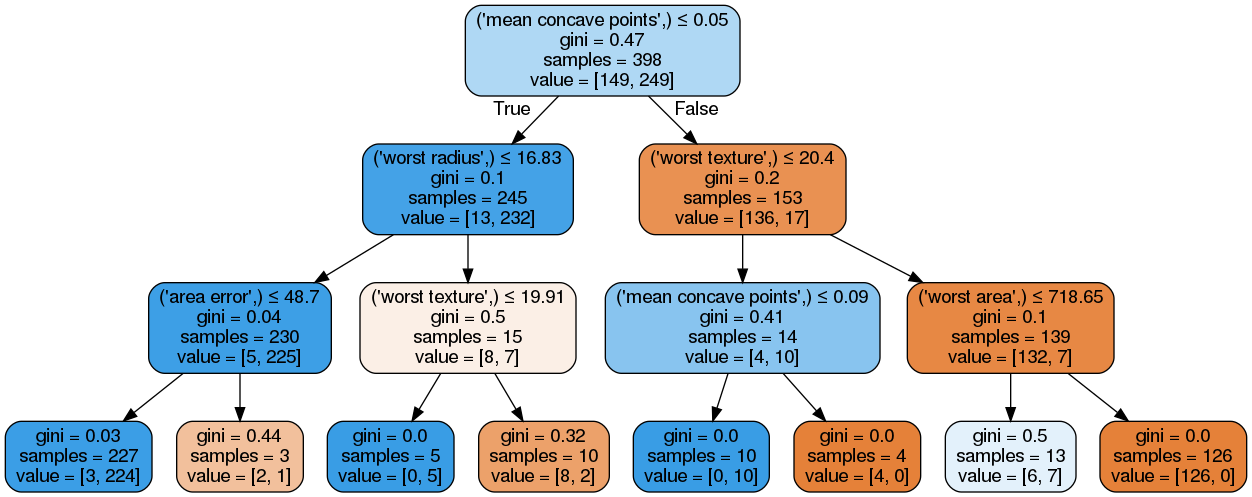

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model,
                out_file=dot_data,
                feature_names= x_train.columns,
                filled=True,
                rounded=True,
                precision=2,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [26]:
tree_model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [57]:
tree_model.predict_proba(x_test)[0:10]

array([[0.01321586, 0.98678414],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01321586, 0.98678414],
       [0.01321586, 0.98678414],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.46153846, 0.53846154],
       [0.01321586, 0.98678414]])

<h4>5- Fit a Random Forest</h4>

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
rf_model = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
rf_model.fit(x_train, y_train)

# Extract single tree
rf_model_tree5 = rf_model.estimators_[5]

#let's look at all trees
#rf_model.estimators_

In [72]:
rf_model_tree5

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=516557500, splitter='best')

In [84]:
rf_model.score(x_test,y_test)

0.8947368421052632

In [39]:
rf_model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

let's visualize the random forest!

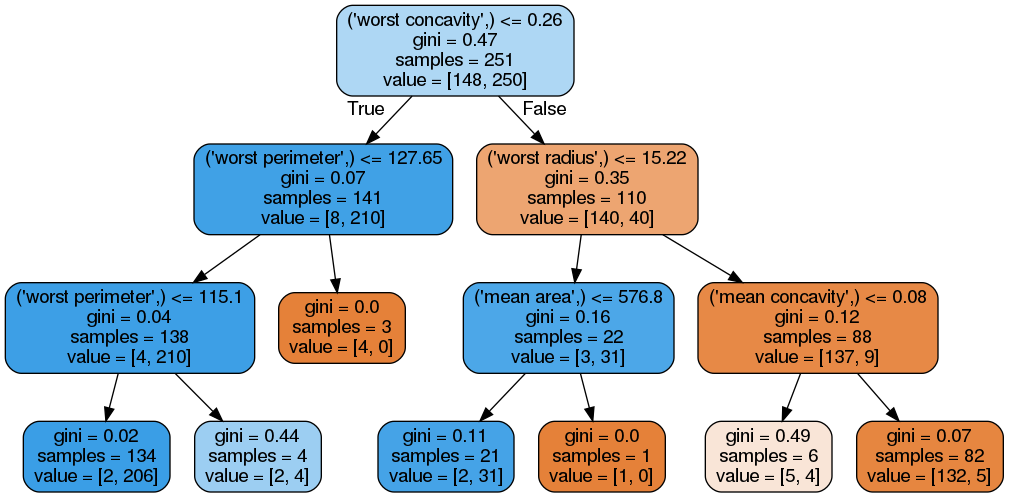

In [91]:
selected_tree=2                                         #which tree do you want to visualize?

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(rf_model.estimators_[selected_tree],    #change the number to look at a different tree
                out_file=dot_data2,
                filled=True,
                precision=2,
                feature_names=x_train.columns,
                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph.create_png())

<h4>6- Generate a ROC curve</h4>

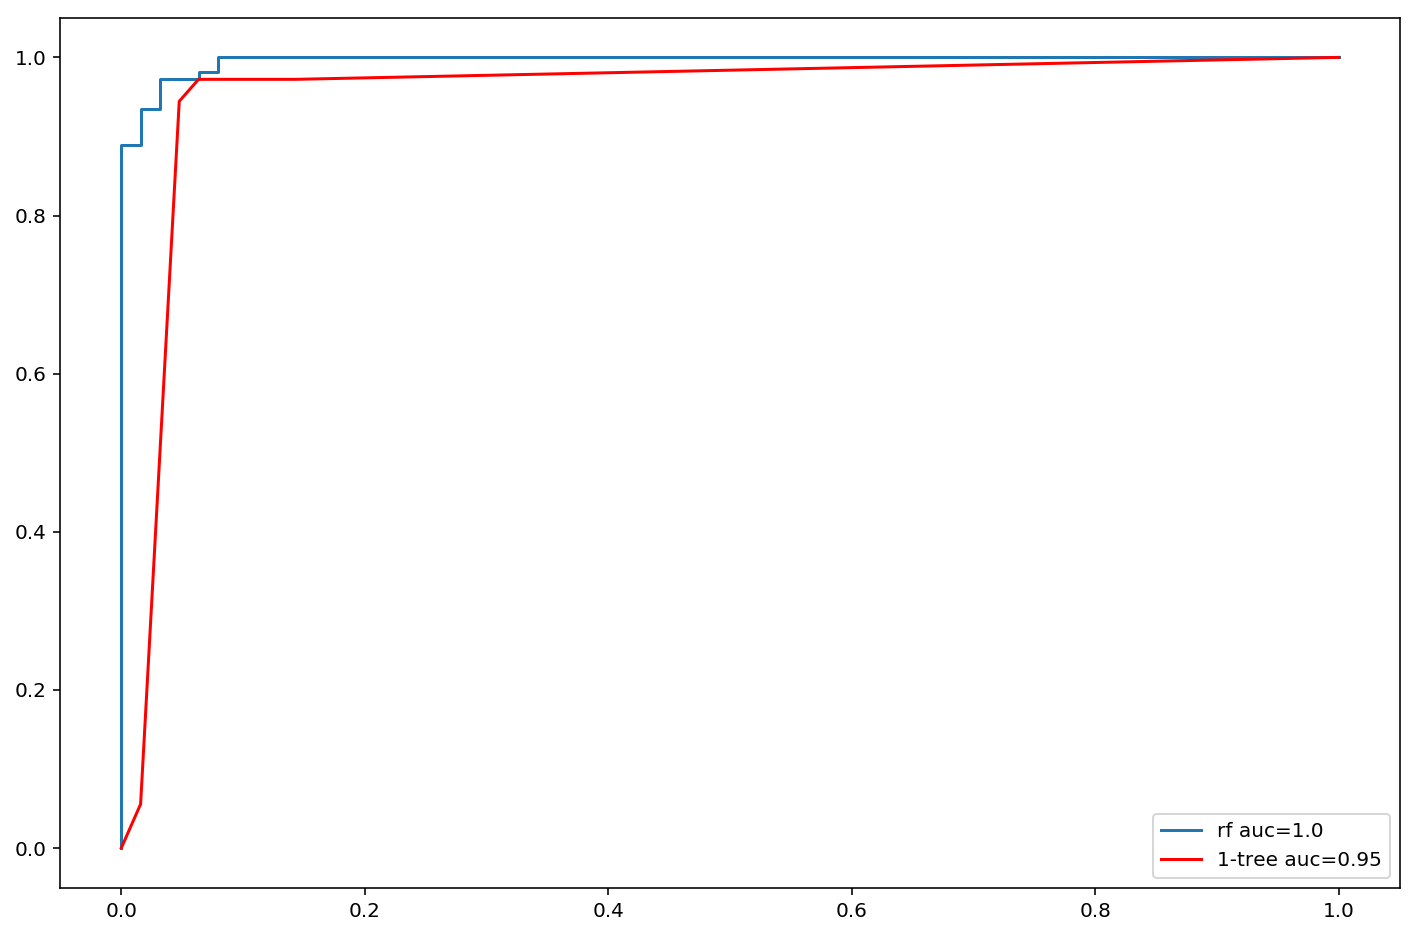

In [74]:
#ROC CURVE FOR RANDOM FOREST
y_pred_proba_rf = rf_model.predict_proba(x_test)[::,1] #pull the probabilities of having a heart disease
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf) #calculate the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf).round(2) #calculate the area under the curve (AUC)
plt.figure(figsize=(12, 8)) #specify plot size
plt.plot(fpr,tpr,label="rf auc="+str(auc)) #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

#ROC CURVE FOR 1 TREE 
y_pred_proba_tree = tree_model.predict_proba(x_test)[::,1] #pull the probabilities of having a heart disease
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_tree) #calculate the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_tree).round(2) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="1-tree auc="+str(auc),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner
